# Countries by Steel Production 1967 - 2021
Dataset from kaggle: https://www.kaggle.com/datasets/kabhishm/countries-by-steel-production-19672021?select=steel_prod.csv

This is a list of countries by steel production in 1967, 1980, 1990, 2000 and from 2007 to 2021, based on data provided by the World Steel Association. All countries with annual production of crude steel at least 2 million metric tons.
The data set has the production of steel in million metric tons by year and by country.


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns 

First, let's explore the first few rows of our dataset

In [2]:
steel = pd.read_csv('steel_prod.csv')
steel.head()

,Rank,Country/Region,2021,2020,2019,2018,2017,2016,2015,2014,...,2012,2011,2010,2009,2008,2007,2000,1990,1980,1967
0,-,World,1951.9,1877.5,1874.4,1808.4,1674.8,1606.3,1620.4,1670.1,...,1552.9,1490.1,1413.6,1219.7,1326.5,1351.3,850.1,770.4,716.4,497.2
1,1,China,1032.8,1064.8,995.4,920,831.7,786.9,803.8,822.7,...,724.7,683.3,626.7,573.6,500.3,494.9,128.5,66.4,37.1,14
2,-,European Union,152.5,139.2,159.4,168.2,168.7,162.3,166.2,169.3,...,168.6,177.7,172.8,139.3,198.2,210.2,193.5,191.8,208,NaN
3,2,India,118.2,100.3,111.4,109.3,101.5,95.5,89.6,87.3,...,77.3,72.2,68.3,62.8,57.8,53.5,26.9,15,9.5,6.3
4,3,Japan,96.3,83.2,99.3,104.3,104.7,104.8,105.2,110.7,...,107.2,107.6,109.6,87.5,118.7,120.2,106.4,110.3,111.4,62


In [3]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Rank            48 non-null     object
 1   Country/Region  49 non-null     object
 2   2021            49 non-null     object
 3   2020            49 non-null     object
 4   2019            48 non-null     object
 5   2018            48 non-null     object
 6   2017            48 non-null     object
 7   2016            47 non-null     object
 8   2015            47 non-null     object
 9   2014            47 non-null     object
 10  2013            48 non-null     object
 11  2012            48 non-null     object
 12  2011            48 non-null     object
 13  2010            48 non-null     object
 14  2009            48 non-null     object
 15  2008            48 non-null     object
 16  2007            48 non-null     object
 17  2000            46 non-null     object
 18  1990        

In [4]:
#exploring null values
steel[['2015','Country/Region']].value_counts()

2015    Country/Region      
-       Soviet Union            1
10.8    United Kingdom          1
105.2   Japan                   1
12.5    Canada                  1
14.9    Spain                   1
15      France                  1
16.1    Iran                    1
1620.4  World                   1
166.2   European Union          1
18.3    Mexico                  1
2       Oman                    1
        Portugal                1
2.1     Luxembourg              1
2.6     Belarus                 1
2.9     Pakistan                1
21.4    Taiwan                  1
22      Italy                   1
22.9    Ukraine                 1
3       United Arab Emirates    1
3.4     Romania                 1
3.6     Kazakhstan              1
3.7     Thailand                1
3.8     Malaysia                1
31.5    Turkey                  1
33.3    Brazil                  1
4       Finland                 1
4.4     Algeria                 1
        Sweden                  1
4.6     Slovakia   

In the year 1967, many countries didn't have any values for Steel production. We're going to assuem those countries didn't produce any steel in that year. We will replace those empty values with NumPy's `NaN` for easier analysis

In [5]:
steel['1967']= steel['1967'].fillna(np.nan)

Multiple rows have `-`. We will replace that with `np.nan` as well

In [6]:
steel['1967'] = steel['1967'].replace(0,np.nan)


Let's create a function that does the following:
1. Fills nulls with '0'
2. Replaces '-' with '0'
3. Converts column type to float

In [7]:
def clean_col(col):
    col = col.fillna('0')
    col = col.replace('-','0')
    col = col.astype(float)
    return col

now let's loop through all columns 

In [8]:
for c in steel.columns[2:]:
    col = steel[c]
    col = clean_col(col)
    steel[c]=col

In [9]:
#cleaning column[0]
steel['Rank']= clean_col(steel['Rank'])

In [10]:
steel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            49 non-null     float64
 1   Country/Region  49 non-null     object 
 2   2021            49 non-null     float64
 3   2020            49 non-null     float64
 4   2019            49 non-null     float64
 5   2018            49 non-null     float64
 6   2017            49 non-null     float64
 7   2016            49 non-null     float64
 8   2015            49 non-null     float64
 9   2014            49 non-null     float64
 10  2013            49 non-null     float64
 11  2012            49 non-null     float64
 12  2011            49 non-null     float64
 13  2010            49 non-null     float64
 14  2009            49 non-null     float64
 15  2008            49 non-null     float64
 16  2007            49 non-null     float64
 17  2000            49 non-null     float

### Using 'Country/Region' as an index
We will drop the Rank column. It's important to note that even after droppng the `Rank` column, the rows are still ordered by rank

In [11]:
steel_clean = steel.set_index('Country/Region')
steel_clean = steel_clean.drop('Rank', axis=1)
steel_clean.head(10)

,2021,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,2000,1990,1980,1967
Country/Region,,,,,,,,,,,,,,,,,,,
World,1951.9,1877.5,1874.4,1808.4,1674.8,1606.3,1620.4,1670.1,1649.3,1552.9,1490.1,1413.6,1219.7,1326.5,1351.3,850.1,770.4,716.4,497.2
China,1032.8,1064.8,995.4,920.0,831.7,786.9,803.8,822.7,779.0,724.7,683.3,626.7,573.6,500.3,494.9,128.5,66.4,37.1,14.0
European Union,152.5,139.2,159.4,168.2,168.7,162.3,166.2,169.3,166.4,168.6,177.7,172.8,139.3,198.2,210.2,193.5,191.8,208.0,0.0
India,118.2,100.3,111.4,109.3,101.5,95.5,89.6,87.3,81.2,77.3,72.2,68.3,62.8,57.8,53.5,26.9,15.0,9.5,6.3
Japan,96.3,83.2,99.3,104.3,104.7,104.8,105.2,110.7,110.6,107.2,107.6,109.6,87.5,118.7,120.2,106.4,110.3,111.4,62.0
United States,85.8,72.7,87.8,86.6,81.6,78.5,78.9,88.2,87.0,88.6,86.2,80.6,58.2,91.4,98.1,101.8,89.7,101.4,115.0
Russia,75.6,71.6,71.7,72.0,71.3,70.5,71.1,71.5,69.4,70.6,68.7,66.9,60.0,68.5,72.4,59.1,0.0,0.0,0.0
South Korea,70.4,67.1,71.4,72.5,71.1,68.6,69.7,71.5,66.0,69.3,68.5,58.5,48.6,53.6,51.5,43.1,23.1,8.5,0.3
Turkey,40.4,35.8,33.7,37.3,37.5,33.2,31.5,34.0,34.7,35.9,34.1,29.0,25.3,26.8,25.8,14.3,9.4,2.5,1.0


## Cleaning complete
- All null values have been replaced with NumPy's `NaN`
- All numerical values have been converted to floats

Only step remaining is to reorder the columns so that the lowest year is on the left:

In [12]:
steel_clean = steel_clean[steel_clean.columns[::-1]] #reversing the order of the columns
steel_clean.head(10)

,1967,1980,1990,2000,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country/Region,,,,,,,,,,,,,,,,,,,
World,497.2,716.4,770.4,850.1,1351.3,1326.5,1219.7,1413.6,1490.1,1552.9,1649.3,1670.1,1620.4,1606.3,1674.8,1808.4,1874.4,1877.5,1951.9
China,14.0,37.1,66.4,128.5,494.9,500.3,573.6,626.7,683.3,724.7,779.0,822.7,803.8,786.9,831.7,920.0,995.4,1064.8,1032.8
European Union,0.0,208.0,191.8,193.5,210.2,198.2,139.3,172.8,177.7,168.6,166.4,169.3,166.2,162.3,168.7,168.2,159.4,139.2,152.5
India,6.3,9.5,15.0,26.9,53.5,57.8,62.8,68.3,72.2,77.3,81.2,87.3,89.6,95.5,101.5,109.3,111.4,100.3,118.2
Japan,62.0,111.4,110.3,106.4,120.2,118.7,87.5,109.6,107.6,107.2,110.6,110.7,105.2,104.8,104.7,104.3,99.3,83.2,96.3
United States,115.0,101.4,89.7,101.8,98.1,91.4,58.2,80.6,86.2,88.6,87.0,88.2,78.9,78.5,81.6,86.6,87.8,72.7,85.8
Russia,0.0,0.0,0.0,59.1,72.4,68.5,60.0,66.9,68.7,70.6,69.4,71.5,71.1,70.5,71.3,72.0,71.7,71.6,75.6
South Korea,0.3,8.5,23.1,43.1,51.5,53.6,48.6,58.5,68.5,69.3,66.0,71.5,69.7,68.6,71.1,72.5,71.4,67.1,70.4
Turkey,1.0,2.5,9.4,14.3,25.8,26.8,25.3,29.0,34.1,35.9,34.7,34.0,31.5,33.2,37.5,37.3,33.7,35.8,40.4


## Let's Visualize! 
Since Index `0` is `World`, we will look at rows `1:6` to see the Top 5 countries producing Steel.

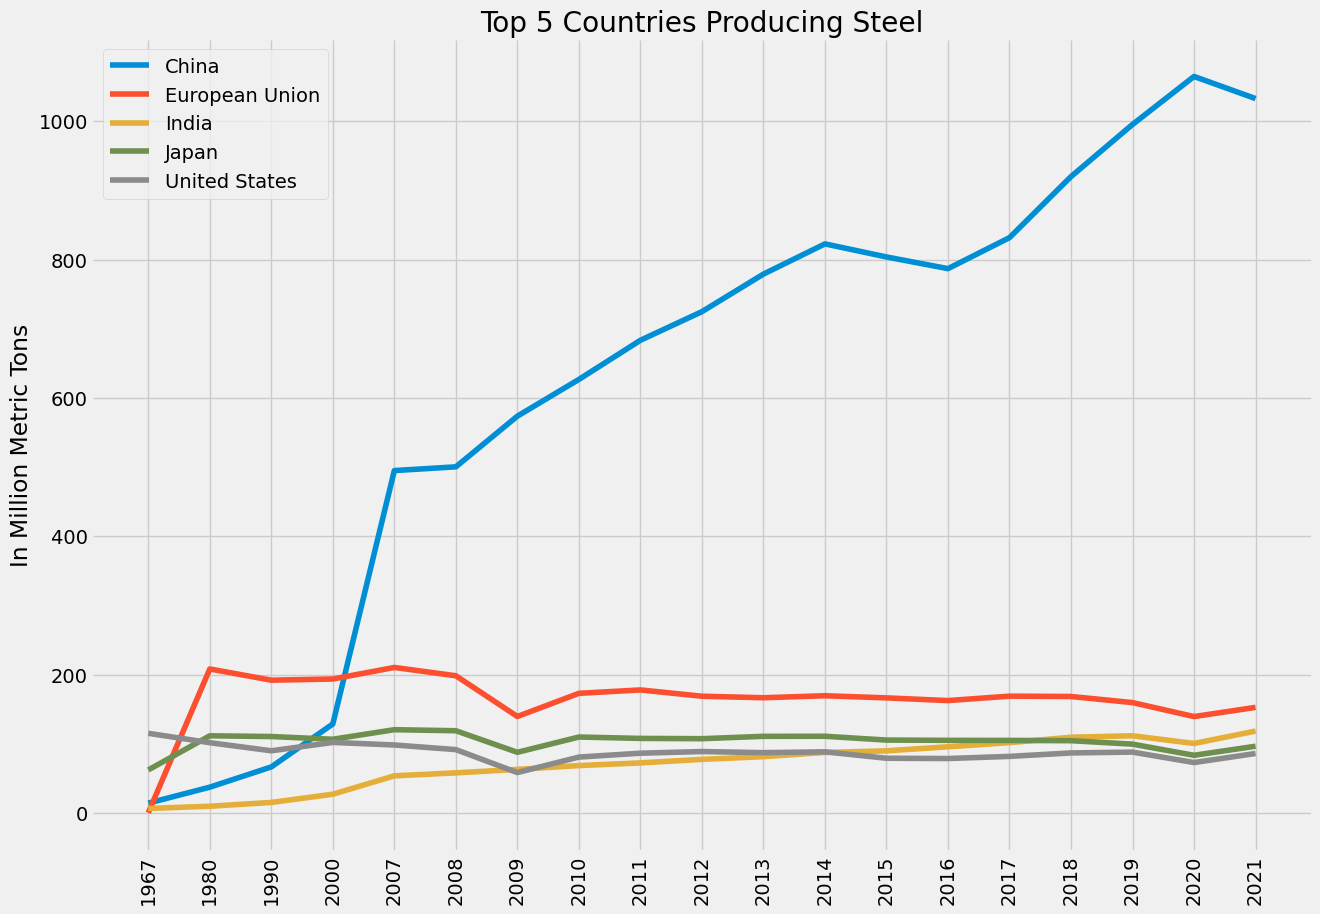

In [18]:
style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(14,10))

#looping throug the countries in the dataframe index 
for c in steel_clean.index[1:6]:
    ax.plot(steel_clean.loc[c], label = c)


plt.xticks( rotation = 90)

#Customizations
ax.tick_params(left = False, bottom = False)

#removing all 4 axes
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
plt.legend(loc = 'upper left')

plt.title('Top 5 Countries Producing Steel')
plt.ylabel('In Million Metric Tons')

plt.show()

## China Produces More Steel Than Any Other Country By a Long Shot

- In 2021 China produced over 1000 million metric tons of Steel
- That's more than 5 times the amount produces by the next largest producer: the EU
- The EU produced less than 200 million metric tons

Let's take a closer look at the other steel producing companies, excluding China

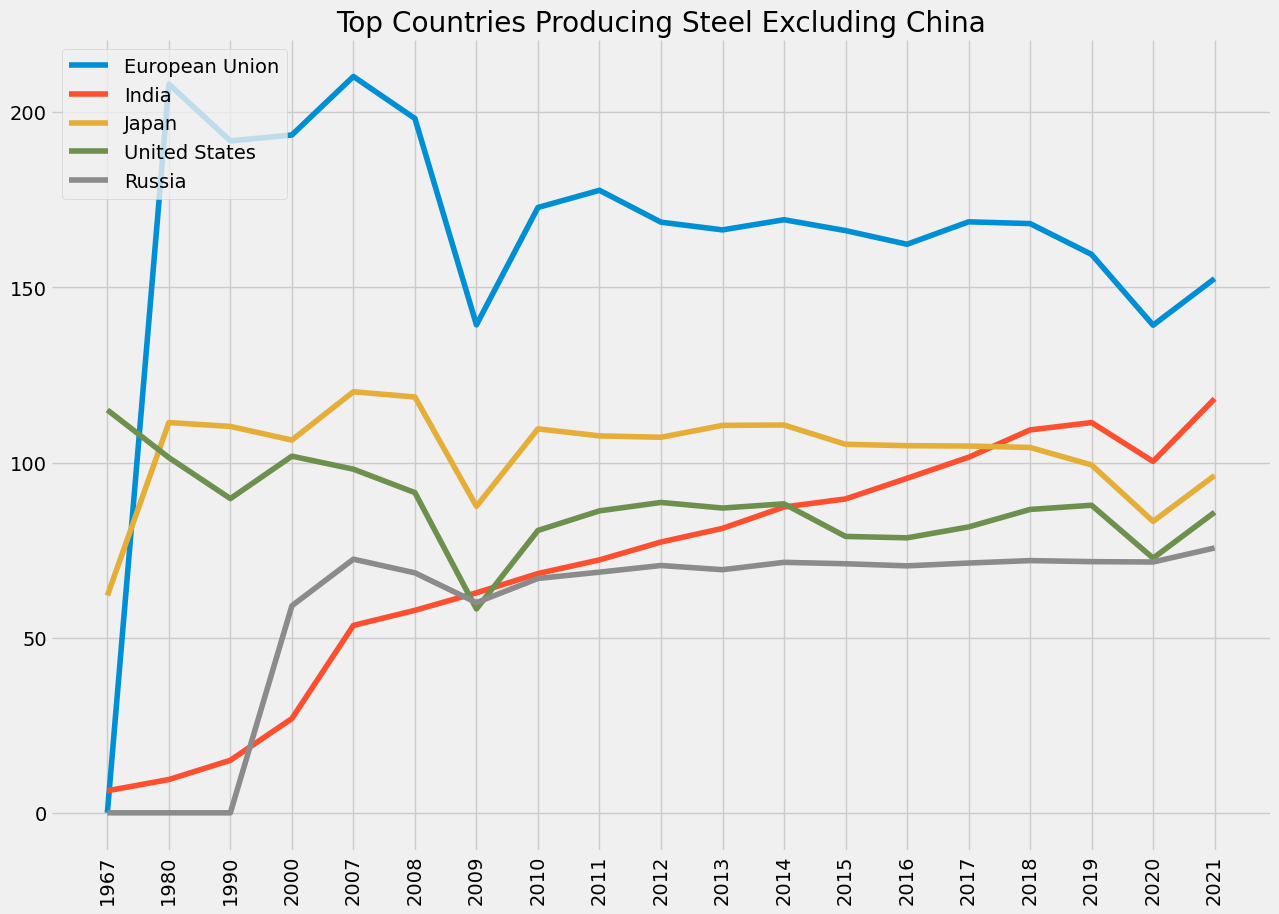

In [21]:
fig, ax = plt.subplots(figsize=(14,10))

for c in steel_clean.index[2:7]: #looping throug the countries in the dataframe index
    ax.plot(steel_clean.loc[c], label = c)


plt.xticks( rotation = 90)

#Customizations
ax.tick_params(left = False, bottom = False)

#removing all 4 axes
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
plt.legend(loc = 'upper left')

plt.title('Top Countries Producing Steel Excluding China')

plt.show()

## Observations

- Top 5 steel producing countries after China are:
    1. EU
    2. India
    3. Japan
    4. USA
    5. Russia
- Since the year 2000, these countries maintained their relative positions with one exception: __India__

Let's take a closer look at India

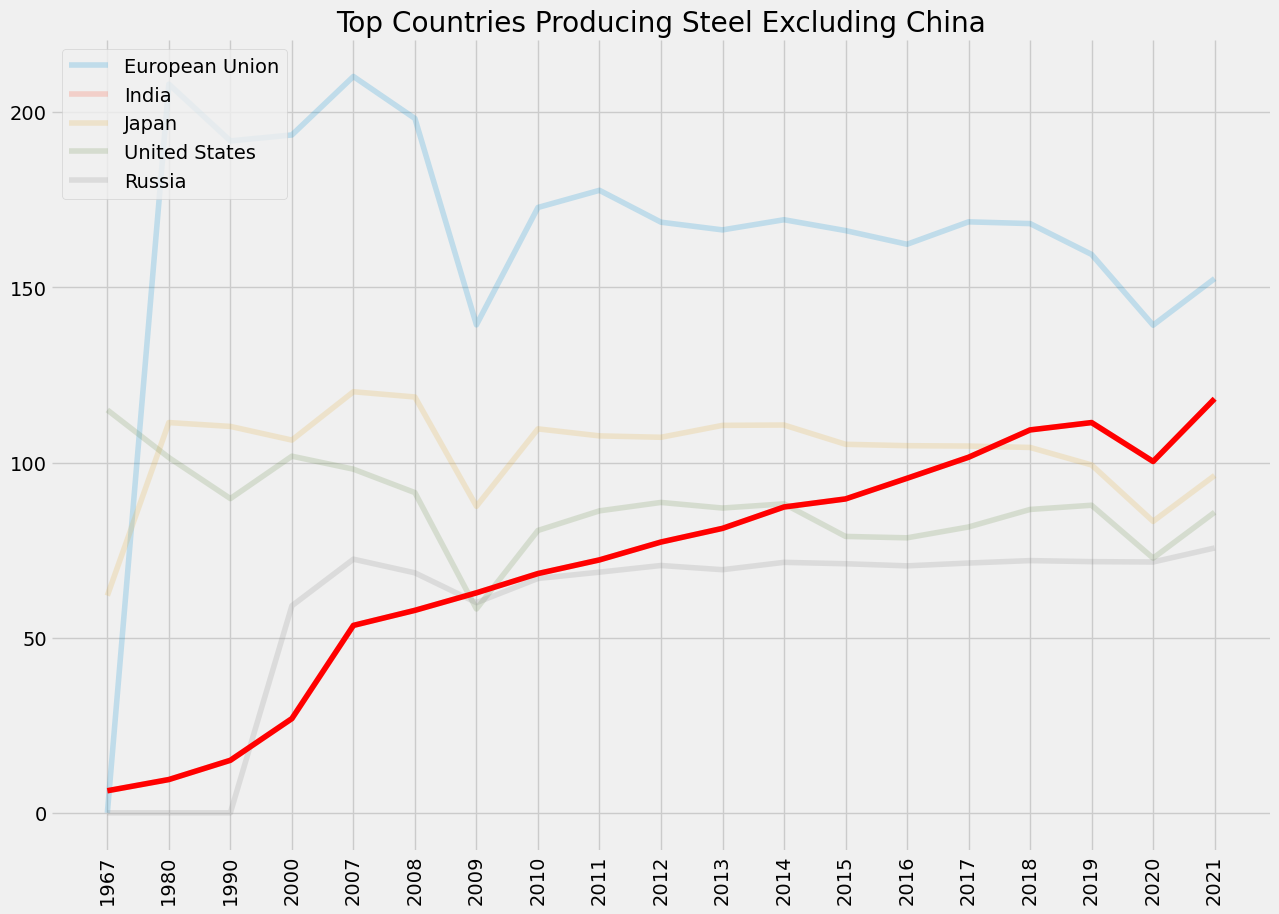

In [25]:
fig, ax = plt.subplots(figsize=(14,10))

for c in steel_clean.index[2:7]: #looping throug the countries in the dataframe index
    ax.plot(steel_clean.loc[c], label = c, alpha = 0.2) #alpa = 0.2 for a faded look

ax.plot(steel_clean.loc['India'], color = 'red')
        
plt.xticks( rotation = 90)

#Customizations
ax.tick_params(left = False, bottom = False)

#removing all 4 axes
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
plt.legend(loc = 'upper left')

plt.title('Top Countries Producing Steel Excluding China')

plt.show()

## India: Steady Rise
- In the year 2000, India was the world's 6th largest steel producer
- in 2009, India surpassed Russia to become the 5th largest steel producer
- In 2014, it surpassed the US to become the 4th largest steel producer
- Between 2017-2018, India surpassed Japan to become the 3rd largest steel producer, a position it retains until today.



#### Next, let's see how China's steel production compares with the total world production

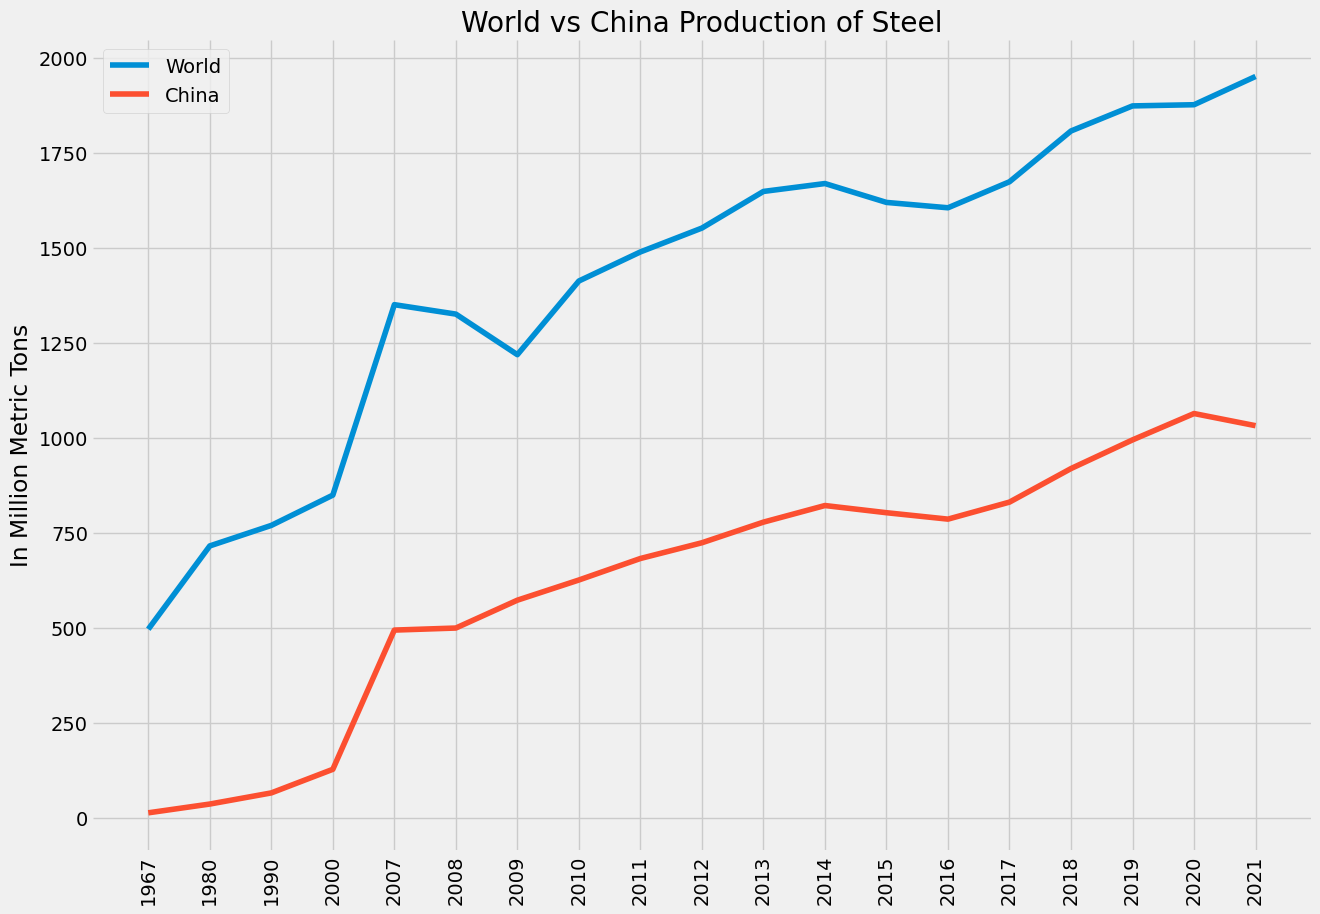

In [14]:
fig, ax = plt.subplots(figsize=(14,10))

for c in steel_clean.index[0:2]: #looping throug the countries in the dataframe index
    ax.plot(steel_clean.loc[c], label = c)


plt.xticks( rotation = 90)

#Customizations
ax.tick_params(left = False, bottom = False)

#removing all 4 axes
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
plt.legend(loc = 'upper left')

plt.title('World vs China Production of Steel')
plt.ylabel('In Million Metric Tons')

plt.show()

## China's production appears to be the main driver in increasing world steel production

Let's see how China steel production in 2021 compares to the other major steel producers

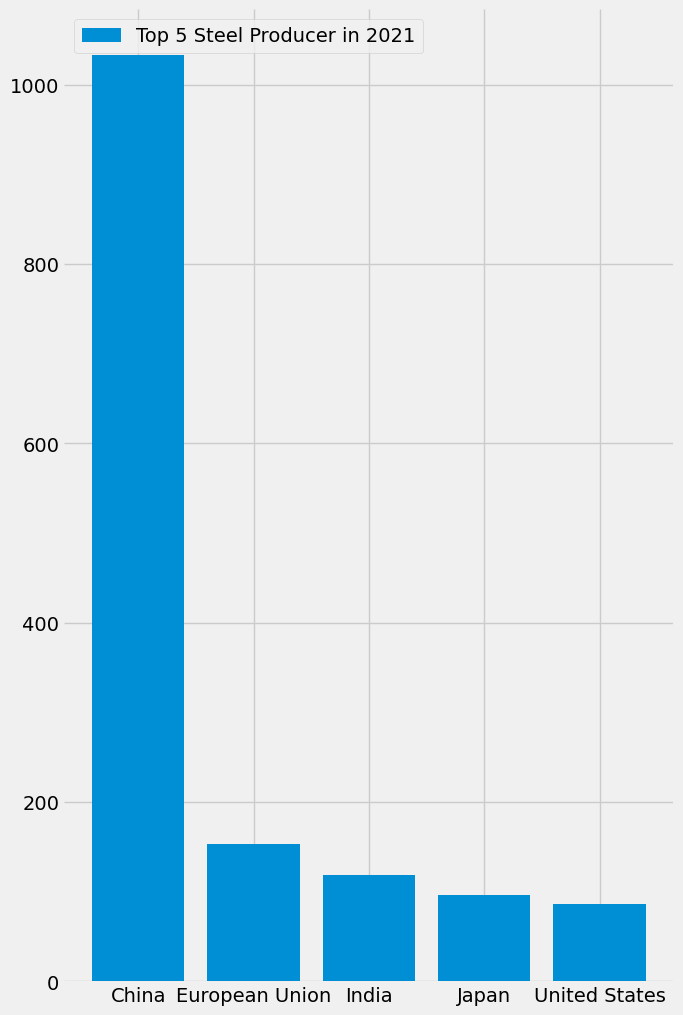

In [26]:
#We can use this snippet to look at specific years

year = '2021'
new = steel_clean[year].reset_index()

fig, ax = plt.subplots(figsize=(7,12))

ax.bar(new['Country/Region'][1:6], new[year][1:6], label = f"Top 5 Steel Producer in {year}")

#Customizations
ax.tick_params(left = False, bottom = False)

#removing all 4 axes
for location in ['left', 'right', 'bottom', 'top']:
    ax.spines[location].set_visible(False)
plt.legend(loc = 'upper left')


plt.show()

In [30]:
list(steel_clean.columns)

['1967',
 '1980',
 '1990',
 '2000',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']